## Learning Objectives

explain and demonstrate how R handles missing data: NA, NaN, NULL

demonstrate the ability to use functions such as mean, var, table, cut, paste, rep, seq, sort, order, length, unique to solve data-driven problems

read and write basic .csv data

explain and demonstrate positional, named, and logical indexing

list the differences between lists, vectors, factors, and data.frames, and when to use each


In [44]:
myDF <- read.csv("/anvil/projects/tdm/data/olympics/athlete_events.csv", stringsAsFactors=TRUE)

In [2]:
str(myDF)

'data.frame':	271116 obs. of  15 variables:
 $ ID    : int  1 2 3 4 5 5 5 5 5 5 ...
 $ Name  : Factor w/ 134732 levels "  Gabrielle Marie \"Gabby\" Adcock (White-)",..: 8 9 44095 29259 21426 21426 21426 21426 21426 21426 ...
 $ Sex   : Factor w/ 2 levels "F","M": 2 2 2 2 1 1 1 1 1 1 ...
 $ Age   : int  24 23 24 34 21 21 25 25 27 27 ...
 $ Height: int  180 170 NA NA 185 185 185 185 185 185 ...
 $ Weight: num  80 60 NA NA 82 82 82 82 82 82 ...
 $ Team  : Factor w/ 1184 levels "30. Februar",..: 199 199 274 279 705 705 705 705 705 705 ...
 $ NOC   : Factor w/ 230 levels "AFG","AHO","ALB",..: 42 42 56 56 146 146 146 146 146 146 ...
 $ Games : Factor w/ 51 levels "1896 Summer",..: 38 49 7 2 37 37 39 39 40 40 ...
 $ Year  : int  1992 2012 1920 1900 1988 1988 1992 1992 1994 1994 ...
 $ Season: Factor w/ 2 levels "Summer","Winter": 1 1 1 1 2 2 2 2 2 2 ...
 $ City  : Factor w/ 42 levels "Albertville",..: 6 18 3 27 9 9 1 1 17 17 ...
 $ Sport : Factor w/ 66 levels "Aeronautics",..: 9 33 25 62 54 5

## Question 1

In [4]:
# Part A

In [8]:
table(myDF$Games)


1896 Summer 1900 Summer 1904 Summer 1906 Summer 1908 Summer 1912 Summer 
        380        1936        1301        1733        3101        4040 
1920 Summer 1924 Summer 1924 Winter 1928 Summer 1928 Winter 1932 Summer 
       4292        5233         460        4992         582        2969 
1932 Winter 1936 Summer 1936 Winter 1948 Summer 1948 Winter 1952 Summer 
        352        6506         895        6405        1075        8270 
1952 Winter 1956 Summer 1956 Winter 1960 Summer 1960 Winter 1964 Summer 
       1088        5127        1307        8119        1116        7702 
1964 Winter 1968 Summer 1968 Winter 1972 Summer 1972 Winter 1976 Summer 
       1778        8588        1891       10304        1655        8641 
1976 Winter 1980 Summer 1980 Winter 1984 Summer 1984 Winter 1988 Summer 
       1861        7191        1746        9454        2134       12037 
1988 Winter 1992 Summer 1992 Winter 1994 Winter 1996 Summer 1998 Winter 
       2639       12977        3436        3160   

In [27]:
# Part B

In [17]:
athletes_1980 <- table(myDF$NOC[myDF$Year == 1980])

In [26]:
athletes_1980


AFG AHO ALB ALG AND ANG ANT ANZ ARG ARM ARU ASA AUS AUT AZE BAH BAN BAR BDI BEL 
 11   0   0  63  11  17   0   0  26   0   0   0 209 158   0   0   0   0   0  90 
BEN BER BHU BIH BIZ BLR BOH BOL BOT BRA BRN BRU BUL BUR CAF CAM CAN CAY CGO CHA 
 17   0   0   0   0   0   0   8   8 149   0   0 413   0   0   0  86   0  25   0 
CHI CHN CIV CMR COD COK COL COM CPV CRC CRO CRT CUB CYP CZE DEN DJI DMA DOM ECU 
  0  38   0  29   0   0  28   0   0  40   0   0 288  21   0  60   0   0   7  16 
EGY ERI ESA ESP EST ETH EUN FIJ FIN FRA FRG FSM GAB GAM GBR GBS GDR GEO GEQ GER 
  0   0   0 226   0  48   0   0 210 244 118   0   0   0 404   0 582   0   0   0 
GHA GRE GRN GUA GUI GUM GUY HAI HKG HON HUN INA IND IOA IRI IRL IRQ ISL ISR ISV 
  0  51   0  10  10   0  10   0   0   0 394   0  78   0   0  57  44  24   0   0 
ITA IVB JAM JOR JPN KAZ KEN KGZ KIR KOR KOS KSA KUW LAO LAT LBA LBR LCA LES LIB 
277   0  32   6  80   0   0   0   0  24   0   0  67  19   0  38   0   0   7  26 
LIE LTU LUX MAD MAL MAR MAS

In [29]:
# Part C

In [31]:
Duplicate_Athletes <- unique(myDF$Name[duplicated(myDF$Name)])

In [32]:
dim(myDF)

[1] 271116     15

In [34]:
myNewDF <- subset(myDF, Name %in% Duplicate_Athletes)

In [35]:
dim(myNewDF)

[1] 194107     15

## Question 2

In [37]:
# Part A

In [40]:
tapply(myDF$Age, myDF$NOC, mean, na.rm=TRUE)

AFG      AHO      ALB      ALG      AND      ANG      ANT      ANZ 
23.53846 26.58974 25.34286 24.37064 23.06509 24.91011 23.22727 24.24691 
     ARG      ARM      ARU      ASA      AUS      AUT      AZE      BAH 
25.89769 24.60633 24.85714 27.21622 24.94141 26.95986 25.42756 26.36096 
     BAN      BAR      BDI      BEL      BEN      BER      BHU      BIH 
22.63636 23.69585 24.43590 27.03160 25.24138 26.48293 25.97222 25.72388 
     BIZ      BLR      BOH      BOL      BOT      BRA      BRN      BRU 
25.98667 25.74930 25.26126 25.96026 24.86517 25.60612 23.83784 22.30000 
     BUL      BUR      CAF      CAM      CAN      CAY      CGO      CHA 
24.19173 24.36585 24.24242 23.35593 25.09324 24.55556 24.41379 23.22500 
     CHI      CHN      CIV      CMR      COD      COK      COL      COM 
25.84423 23.00098 24.24294 24.32226 23.98925 22.85000 24.97276 22.21053 
     CPV      CRC      CRO      CRT      CUB      CYP      CZE      DEN 
25.83333 25.61686 25.18379      NaN 24.39116 24.19111 25.97012 27.35149 
     DJI      DMA      DOM      ECU      EGY      ERI      ESA      ESP 
24.50000 25.63158 24.42366 25.01103 24.74732 24.67442 23.16190 25.25000 
     EST      ETH      EUN      FIJ      FIN      FRA      FRG      FSM 
25.55479 24.34722 24.22300 24.51739 26.58105 26.79586 24.44012 23.84615 
     GAB      GAM      GBR      GBS      GDR      GEO      GEQ      GER 
24.26984 23.26923 26.92549 25.80952 23.12665 25.27972 22.92500 26.82365 
     GHA      GRE      GRN      GUA      GUI      GUM      GUY      HAI 
23.55650 25.49140 22.84000 24.03555 23.40816 24.09091 23.59783 25.01124 
     HKG      HON      HUN      INA      IND      IOA      IRI      IRL 
24.50366 22.28235 25.35908 24.26884 25.54769 25.07447 25.50621 27.47373 
     IRQ      ISL      ISR      ISV      ITA      IVB      JAM      JOR 
24.31013 23.76874 24.18182 27.33677 25.87705 26.20000 24.42331 24.43038 
     JPN      KAZ      KEN      KGZ      KIR      KOR      KOS      KSA 
24.47652 25.40938 25.66122 24.30837 21.63636 23.10249 23.87500 24.50237 
     KUW      LAO      LAT      LBA      LBR      LCA      LES      LIB 
22.62550 21.57407 26.65909 23.50000 22.83333 23.92857 24.90909 24.42066 
     LIE      LTU      LUX      MAD      MAL      MAR      MAS      MAW 
23.27989 25.52411 26.44933 23.72034 23.09091 25.57143 23.54924 24.17241 
     MDA      MDV      MEX      MGL      MHL      MKD      MLI      MLT 
25.54274 20.91837 24.53271 24.75365 20.28571 22.29762 23.71591 25.09649 
     MNE      MON      MOZ      MRI      MTN      MYA      NAM      NBO 
27.07447 30.04712 23.19403 23.33333 24.89286 25.82524 27.85714 22.50000 
     NCA      NED      NEP      NFL      NGR      NIG      NOR      NRU 
23.62810 26.63387 25.47826 21.00000 23.96009 21.89286 26.79657 23.46154 
     NZL      OMA      PAK      PAN      PAR      PER      PHI      PLE 
25.66781 25.18966 25.18058 24.10294 24.02222 24.52789 24.78831 24.00000 
     PLW      PNG      POL      POR      PRK      PUR      QAT      RHO 
22.68000 23.95283 25.68379 27.03943 22.09938 24.68689 23.45143 25.50000 
     ROT      ROU      RSA      RUS      RWA      SAA      SAM      SCG 
23.91667 24.16211 25.56127 25.49349 24.26923 25.06452 25.74603 25.41121 
     SEN      SEY      SGP      SKN      SLE      SLO      SMR      SOL 
25.84309 22.64865 23.32047 24.97619 22.44144 25.30603 25.78453 23.96154 
     SOM      SRB      SRI      SSD      STP      SUD      SUI      SUR 
22.00000 26.41327 25.77857 24.00000 22.20000 23.89831 26.74234 21.67164 
     SVK      SWE      SWZ      SYR      TAN      TCH      TGA      THA 
26.07583 26.82421 24.14925 24.70130 24.90604 25.34229 24.32609 25.07163 
     TJK      TKM      TLS      TOG      TPE      TTO      TUN      TUR 
26.55714 23.87037 24.77778 23.33333 23.41574 24.69169 24.43214 24.75798 
     TUV      UAE      UAR      UGA      UKR      UNK      URS      URU 
20.14286 23.62385 25.69643 23.79365 25.05393      NaN 24.87175 25.19485 
     USA      UZB      VAN      VEN      VIE      VIN      VNM 

In [41]:
# Part B

In [48]:
head(sort(tapply(myDF$Height, myDF$Sport, max, na.rm = TRUE)))
#There are no values given even with the first 5 presetned.

Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"
Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"
Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"
Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"
Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"
Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"
Warning message in FUN(X[[i]], ...):
"no non-missing arguments to max; returning -Inf"


Aeronautics            Alpinism       Basque Pelota             Cricket 
               -Inf                -Inf                -Inf                -Inf 
            Croquet Military Ski Patrol 
               -Inf                -Inf

Markdown notes and sentences and analysis written here.

## Question 3

In [8]:
options(jupyter.rich_display = F )

In [9]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=200)

In [94]:
myDF <- read.csv("/anvil/projects/tdm/data/death_records/DeathRecords.csv", stringsAsFactors = TRUE)

In [69]:
str(myDF)

'data.frame':	2631171 obs. of  38 variables:
 $ Id                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ResidentStatus                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Education1989Revision         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Education2003Revision         : int  2 2 7 6 3 5 4 4 3 3 ...
 $ EducationReportingFlag        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MonthOfDeath                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Sex                           : Factor w/ 2 levels "F","M": 2 2 1 2 2 1 2 2 1 2 ...
 $ AgeType                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Age                           : int  87 58 75 74 64 93 82 55 86 23 ...
 $ AgeSubstitutionFlag           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AgeRecode52                   : int  43 37 41 40 38 44 42 37 43 30 ...
 $ AgeRecode27                   : int  23 17 21 20 18 24 22 17 23 10 ...
 $ AgeRecode12                   : int  11 8 10 9 8 11 10 8 11 4 ...
 $ InfantAgeRecode22             : int  0 0 0 0 0 0 0 0 0 0 ...


In [10]:
head(myDF)

  Id ResidentStatus Education1989Revision Education2003Revision
1 1  1              0                     2                    
2 2  1              0                     2                    
3 3  1              0                     7                    
4 4  1              0                     6                    
5 5  1              0                     3                    
6 6  1              0                     5                    
  EducationReportingFlag MonthOfDeath Sex AgeType Age AgeSubstitutionFlag
1 1                      January      M   1       87  0                  
2 1                      January      M   1       58  0                  
3 1                      January      F   1       75  0                  
4 1                      January      M   1       74  0                  
5 1                      January      M   1       64  0                  
6 1                      January      F   1       93  0                  
  AgeRecode52 AgeRecode27 AgeRecod

In [49]:
# Part A

In [11]:
dim(myDF)

[1] 2631171      38

In [62]:
# Part B

In [95]:
month_order <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

In [96]:
myDF$MonthOfDeath <- factor(myDF$MonthOfDeath)

In [97]:
levels(myDF$MonthOfDeath) <- month_order

In [15]:
head(myDF$MonthOfDeath)

[1] January January January January January January
12 Levels: January February March April May June July August ... December

In [ ]:
#part C

In [16]:
table(myDF$MonthOfDeath)


  January  February     March     April       May      June      July    August 
   243719    212363    228872    215957    217242    205058    209757    208399 
September   October  November  December 
   205660    218565    221740    243839 

Markdown notes and sentences and analysis written here.

## Question 4

In [1]:
#Part A

In [29]:
sort(tapply(myDF$Age, myDF$Race, sum))

58        38         6        78        48        28        18        68 
    21518     37764     48003    181474    343187    343845    459858    558312 
        5         7         4         3         2         1 
   670796    801879   1020607   1119665  20523971 167032229

In [26]:
# Part B

In [98]:
length(myDF$Age[myDF$Sex == "F"])

[1] 1299710

In [99]:
head(myDF$Race[myDF$Sex == "F"], n=50)

[1]  1  1  1  1  1  1  1  3  1 28  2  1  1  3  1 38  3  7  1 68  1  1  1  1  1
[26]  3  1  3  1  3  3 28  1 38  1  3  1  1  1  3  1  1  1  1  1 28  1  2  3  3

In [ ]:
sort(tapply(myDF$Age, myDF$Race, sum))

Markdown notes and sentences and analysis written here.

## Question 5

In [65]:
#Part A

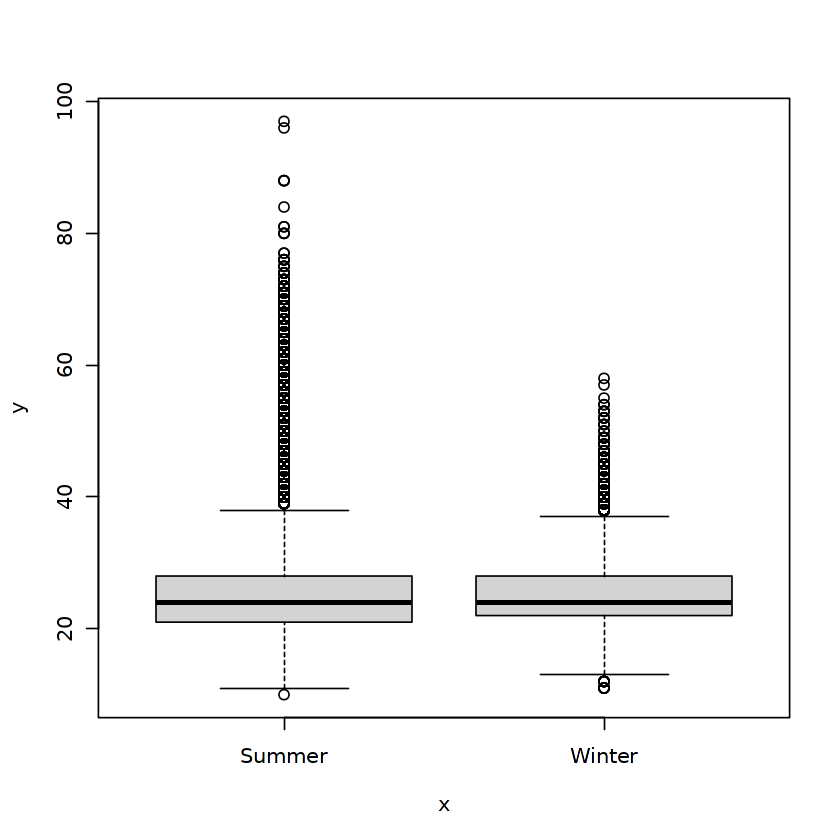

In [64]:
plot(myDF$Season, myDF$Age) 

In [67]:
# I was attempting to find the relations of age to seasons. I wanted to see if one season had older people it would be due to the sports that are in each. For some reason I thought that winter would have people in higher age groups because of the most simple sports such as Curling.
# While I am not sure how right this plot is however the pattern I see is that older people tend to be in the Summer Games over the winter,
#I think with how many more sports that could be the case.

In [70]:
#Part B

In [89]:
subset_myDF <- subset(myDF, Age < 100)

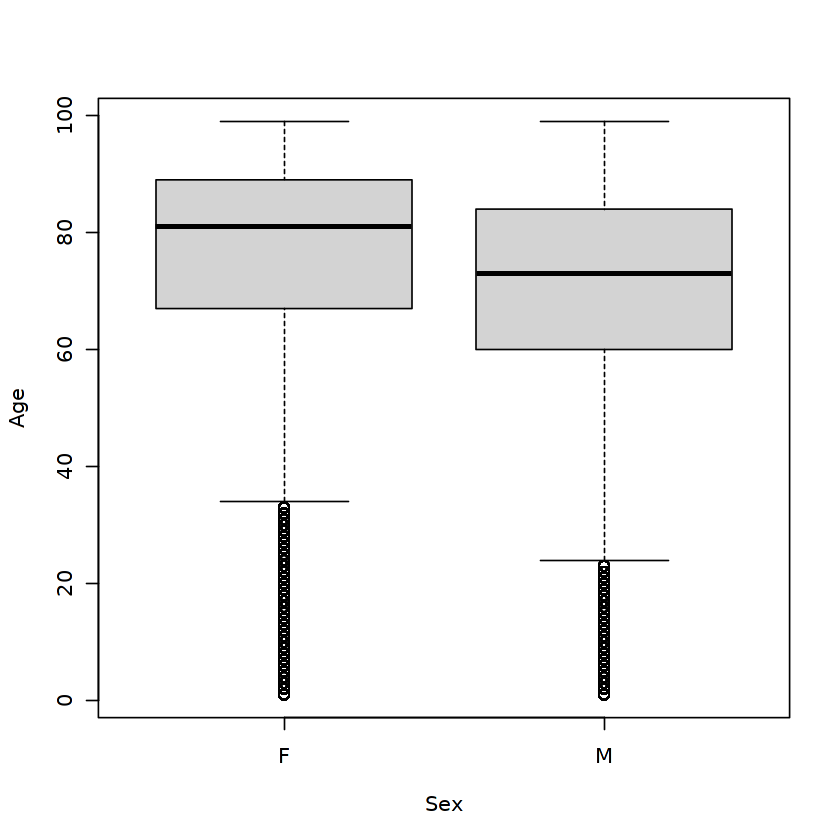

In [92]:
plot(subset_myDF$Sex, subset_myDF$Age, 
     xlab = "Sex", 
     ylab = "Age")